In [ ]:
import tensorflow.keras as tf
import matplotlib.pyplot as plt

In [ ]:
mnist = tf.datasets.mnist
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
ytrain

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
xtrain[788]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  57, 166, 204, 189,  26,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

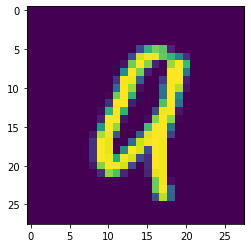

In [ ]:
plt.imshow(xtrain[788])    # bgr
plt.show()

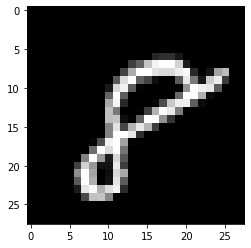

In [ ]:
plt.imshow(xtrain[59999], cmap="gray")   # grayscale
plt.show()

In [ ]:
#### Create a neural Network
model = tf.models.Sequential()  # blank empty model
model.add(tf.layers.Flatten())
model.add(tf.layers.Dense(784, activation = "relu"))    # no. of neurons here --> multiple of 16
model.add(tf.layers.Dense(10, activation = "softmax"))   # don't use sigmoid in case of mullticlass
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])    # adam --> weight optimizer


In [ ]:
### Scale the data
xtrain = xtrain/255   # to increase the accuracy
xtest = xtest/255

In [ ]:
### Train the model
model.fit(xtrain, ytrain, epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1892 - accuracy: 0.9446
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0775 - accuracy: 0.9761
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0504 - accuracy: 0.9835
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0344 - accuracy: 0.9886
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0258 - accuracy: 0.9916
Epoch 6/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0182 - accuracy: 0.9940
Epoch 7/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0189 - accuracy: 0.9940
Epoch 8/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0136 - accuracy: 0.9956
Epoch 9/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0128 - accuracy: 0.9956
Epoch 10/20
1875/1875 [==============================] - 10s 5ms/step - lo

In [ ]:
ypred = model.predict(xtest)


In [ ]:
ytest[5550]

1

In [ ]:
ypred[5550]

array([1.1209530e-19, 9.9999964e-01, 1.7320381e-19, 9.2830406e-19,
       2.8822389e-10, 1.1159640e-14, 3.2131290e-12, 1.5156780e-11,
       3.8725869e-07, 6.4798497e-16], dtype=float32)

In [ ]:
import numpy as np
np.argmax(ypred[5550])

1

In [ ]:
model.evaluate(xtest, ytest)

313/313 [==============================] - 1s 2ms/step - loss: 0.1221 - accuracy: 0.9819


[0.12206660211086273, 0.9818999767303467]

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, np.argmax(ypred, axis = 1))
cm

array([[ 970,    1,    0,    0,    1,    0,    4,    1,    3,    0],
       [   0, 1124,    1,    2,    0,    1,    2,    1,    4,    0],
       [   4,    0, 1004,    5,    2,    0,    1,    8,    8,    0],
       [   1,    0,    3,  992,    0,    4,    0,    3,    3,    4],
       [   0,    0,    4,    1,  967,    0,    1,    2,    0,    7],
       [   2,    0,    0,   11,    1,  868,    3,    1,    5,    1],
       [   1,    4,    0,    1,    3,    2,  946,    0,    1,    0],
       [   1,    0,    4,    2,    1,    0,    0, 1013,    3,    4],
       [   0,    1,    3,    2,    6,    0,    2,    3,  956,    1],
       [   3,    2,    0,    4,   10,    3,    0,    6,    2,  979]])

In [ ]:
from sklearn.metrics import accuracy_score
a = accuracy_score(ytest, np.argmax(ypred, axis = 1))
a

0.9819